# Exploration 2

======================================================================================================

---

# 목차

## (1) 프로젝트 1: 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!
## (2) 프로젝트 2: 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?
## (3) 회고
## (4) Reference

---

## 루브릭 평가 기준

1. 프로젝트 1의 회귀모델 예측정확도가 기준 이상 높게 나왔는가?
   - MSE 손실함수값 3000 이하를 달성
2. 프로젝트 2의 회귀모델 예측정확도가 기준 이상 높게 나왔는가?
   - RMSE 값 150 이하를 달성
3. 시각화 요구사항이 정확하게 이루어졌는가?
   - 각 프로젝트 진행 과정에서 요구하고 있는 데이터개수 시각화 및 예측결과 시각화를 모두 진행하였다.

---

## (1) 프로젝트 1: 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

---

### (1) 데이터 가져오기
- sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
  
  
- diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

In [1]:
# 싸이킷런에서 당뇨병 데이터 로드, matplotlib.pyplot을 plt로 import
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt

In [2]:
# 기본적인 모듈들 import
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
# load해온 당뇨병 데이터를 diabetes 변수에 할당하고 구성 확인
diabetes = load_diabetes()
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [4]:
# 종합 정보 확인
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [5]:
# data를 df_X에 target data를 df_y에 할당
df_X = diabetes.data
df_y = diabetes.target

In [6]:
# 배열 형태 확인
print(df_X.shape)
print(df_y.shape)

(442, 10)
(442,)


In [7]:
# df_X에 data 정보가 할당이 잘 되었는지 확인
df_X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

### (2) 모델에 입력할 데이터 X 준비하기
- df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [8]:
# df_X를 numpy array로 변환 후 저장
df_X = np.array(df_X)

### (3) 모델이 예측할 데이터 y 준비하기
- df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [9]:
# df_y를 numpy array로 변환 후 저장
df_y = np.array(df_y)

### (4) train 데이터와 test 데이터로 분리하기
- X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [10]:
# 싸이킷런의 train_test_model 을 이용하여 train data와 test data로 8:2 사이즈로 분리

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_X,
                                                    df_y,
                                                    test_size=0.2,
                                                    random_state=42)

### (5) 모델 준비하기
- 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
  
  
- 모델 함수를 구현해주세요.

In [11]:
# 형태가 (442,10) 의 배열이기에 range에 10 을 지정하여 모든 컬럼에 가중치를 곱해준 후 편향을 더한 후 predictions 값 반환하는 함수

def model(X, W, b):
    predictions = 0
    for i in range(10): # shape 갯수에 맞게 range 값 조절
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

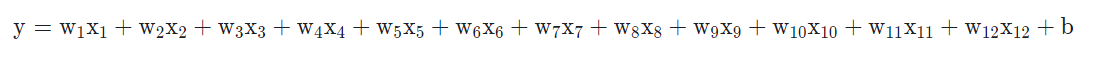

In [12]:
# 랜덤한 가중치 10개와 편향 1개를 생성
W = np.random.rand(10)
b = np.random.rand()

### (6) 손실함수 loss 정의하기
- 손실함수를 MSE 함수로 정의해주세요.

In [13]:
# 손실함수 MSE 함수 정의
def MSE(a,b):
    mse = ((a-b)**2).mean() # 두 값의 차이의 제곱의 평균
    return mse

In [14]:
# 손실함수 loss 함수 정의
# 결과적으로 loss는 model함수와 MSE 함수의 합
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

### (7) 기울기를 구하는 gradient 함수 구현하기
- 기울기를 계산하는 gradient 함수를 구현해주세요.

In [15]:
# 기울기를 구하는 gradient 함수 정의

def gradient(X, W, b, y):
    N = len(W)

    y_pred = model(X, W, b)
    
    dW = 1/N * 2 * X.T.dot(y_pred -y)
    
    db = 2 * (y_pred - y).mean()
    
    return dW, db

### (8) 하이퍼 파라미터인 학습률 설정하기
- 학습률, learning rate 를 설정해주세요
- 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [16]:
# 학습률은 0.01로 설정
Learning_rate = 0.01

### (9) 모델 학습하기
- 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
  
  
- loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
  
  
- 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

In [17]:
# 위에서 정의한 손실함수와 기울기함수로 모델 학습하여 최적의 가중치와 편향을 구함.

losses = []

for i in range(1, 4001):
    dW, db = gradient(x_train, W, b, y_train)
    W -= Learning_rate * dW
    b -= Learning_rate * db
    L = loss(x_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('학습 %d 번째 : 손실값 %0.4f' % (i,L))

학습 100 번째 : 손실값 4687.9503
학습 200 번째 : 손실값 3675.9999
학습 300 번째 : 손실값 3389.9116
학습 400 번째 : 손실값 3234.4907
학습 500 번째 : 손실값 3136.3660
학습 600 번째 : 손실값 3069.9999
학습 700 번째 : 손실값 3023.5696
학습 800 번째 : 손실값 2990.5042
학습 900 번째 : 손실값 2966.6950
학습 1000 번째 : 손실값 2949.4050
학습 1100 번째 : 손실값 2936.7538
학습 1200 번째 : 손실값 2927.4283
학습 1300 번째 : 손실값 2920.5028
학습 1400 번째 : 손실값 2915.3200
학습 1500 번째 : 손실값 2911.4107
학습 1600 번째 : 손실값 2908.4376
학습 1700 번째 : 손실값 2906.1572
학습 1800 번째 : 손실값 2904.3925
학습 1900 번째 : 손실값 2903.0143
학습 2000 번째 : 손실값 2901.9274
학습 2100 번째 : 손실값 2901.0617
학습 2200 번째 : 손실값 2900.3650
학습 2300 번째 : 손실값 2899.7980
학습 2400 번째 : 손실값 2899.3313
학습 2500 번째 : 손실값 2898.9427
학습 2600 번째 : 손실값 2898.6152
학습 2700 번째 : 손실값 2898.3356
학습 2800 번째 : 손실값 2898.0941
학습 2900 번째 : 손실값 2897.8827
학습 3000 번째 : 손실값 2897.6954
학습 3100 번째 : 손실값 2897.5275
학습 3200 번째 : 손실값 2897.3751
학습 3300 번째 : 손실값 2897.2354
학습 3400 번째 : 손실값 2897.1059
학습 3500 번째 : 손실값 2896.9848
학습 3600 번째 : 손실값 2896.8705
학습 3700 번째 : 손실값 2896.7619
학습 3800 번째

In [18]:
# 위에서 구한 최적의 가중치와 편향 확인
print('최적의 가중치 : \n', W)
print('-------------------------------------------------------')
print('최적의 편향 : ' , b)

최적의 가중치 : 
 [  41.25434069 -239.87366881  555.89406322  341.98485072 -112.37737631
 -119.01946249 -209.70321534  152.76674796  421.6957596    60.53631661]
-------------------------------------------------------
최적의 편향 :  151.3024138833817


### (10) test 데이터에 대한 성능 확인하기
- test 데이터에 대한 성능을 확인해주세요.

In [19]:
# test data를 LinearRegression에 fit하고 predictions에 할당하여 출력

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train, y_train)

predictions = model.predict(x_test)
predictions

array([139.5483133 , 179.52030578, 134.04133298, 291.41193598,
       123.78723656,  92.17357677, 258.23409704, 181.33895238,
        90.22217862, 108.63143298,  94.13938654, 168.43379636,
        53.50669663, 206.63040068, 100.13238561, 130.66881649,
       219.53270758, 250.78291772, 196.36682356, 218.57497401,
       207.35002447,  88.48361667,  70.43428801, 188.95725301,
       154.88720039, 159.35957695, 188.31587948, 180.38835506,
        47.98988446, 108.97514644, 174.78080029,  86.36598906,
       132.95890535, 184.5410226 , 173.83298051, 190.35863287,
       124.41740796, 119.65426903, 147.95402494,  59.05311211,
        71.62636914, 107.68722902, 165.45544477, 155.00784964,
       171.04558668,  61.45763075,  71.66975626, 114.96330486,
        51.57808027, 167.57781958, 152.52505798,  62.95827693,
       103.49862017, 109.20495627, 175.63844013, 154.60247734,
        94.41476124, 210.74244148, 120.25601864,  77.61590087,
       187.93503183, 206.49543321, 140.63018684, 105.59

In [20]:
MSE(y_test, predictions)

2900.1732878832318

- 위에서 LinearRegression으로 구한 predictions를 통해 손실함수를 구함. 약 2900점이 나와 적절한 모델이라고 판단된다

### (11) 정답 데이터와 예측한 데이터 시각화하기
- x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

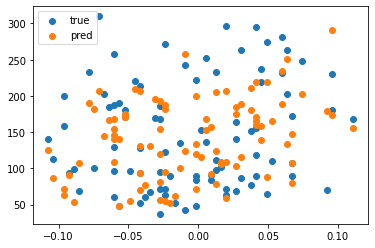

In [21]:
# 산점도 그래프를 이용하였고 legend를 통해 true와 pred의 색깔을 분류하여 보기 쉽게 표현

plt.scatter(x_test[:,0], y_test, label="true")
plt.scatter(x_test[:,0], predictions, label="pred")
plt.legend()
plt.show()

---

## (2) 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?
---

### (1) 데이터 가져오기
- 터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.
  
  
- 여기에서 데이터를 상세히 확인할 수 있습니다.

In [22]:
# pd.read_csv 함수를 이용해 해당 경로에 있는 csv파일을 train 변수에 할당
train = pd.read_csv('~/aiffel/exp/02_regression_analysis/data/bike-sharing-demand/train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
- pandas datetime extract year month day 키워드로 검색해 보기

In [23]:
# train 데이터의 dtypes 확인
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [24]:
# train data의 형태 확인
train.shape

(10886, 12)

In [25]:
# date2라는 컬럼을 datetime64의 형태로 생성
train['date2'] = pd.to_datetime(train['datetime'])

In [26]:
# date2 컬럼이 생성이 잘 되었는지 확인
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date2
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01 02:00:00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01 03:00:00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01 04:00:00


#### 데이터 정보

- 2011-01-01- 00:00:00 부터 2012-12-19 23:00:00 까지의 데이터
  
  
- ** 특이사항 
   - 모든 달의 1일부터 19일 데이터까지만 있다.
   - 20일 ~ 마지막날까지의 데이터 없음.
   - 간혹 새벽 , 오후에 1~2시간씩 데이터 없음
   - 시작일인 2011-01-01은 토요일이다.
   
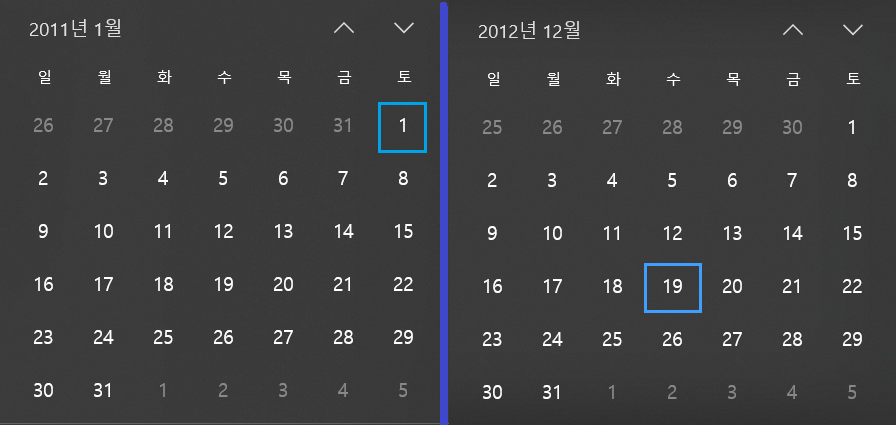


In [27]:
# pandas의 datetime을 이용해 만든 date2를 이용해 연,월,일,시,분,초 로 컬럼을 분리

train['year'] = train['date2'].dt.year
train['month'] = train['date2'].dt.month
train['day'] = train['date2'].dt.day
train['hour'] = train['date2'].dt.hour
train['minute'] = train['date2'].dt.minute
train['second'] = train['date2'].dt.second

In [28]:
# 연, 월, 일, 시 , 분, 초 컬럼이 잘 생성 되었는지 확인

train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'date2', 'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

In [29]:
# 연, 월, 일, 시, 분, 초 컬럼을 생성하였으니 필요 없어진 date2 컬럼을 삭제

train = train.drop(['date2'],axis=1)

In [30]:
# 분리된 데이터가 있으니 본 object type이었던 datetime도 삭제

train = train.drop(['datetime'],axis=1)

In [31]:
# drop이 잘 되었는지 컬럼 확인

train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'year',
       'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

In [32]:
# datetime으로 분리한 컬럼들의 타입이 올바른지 확인

train.dtypes

season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
year            int64
month           int64
day             int64
hour            int64
minute          int64
second          int64
dtype: object

- datetime : 연월일시분초 (datetime으로 year, month, day, hour, minute, second 로 분리)
- season : 1 = 봄 , 2 = 여름, 3 = 가을, 4 = 겨울                                                  
- (공식 문서에는 봄 여름 가을 겨울이나 각각 1 = 1, 2, 3월 , 2 = 4, 5, 6월, 3 = 7, 8, 9월 4 = 10, 11, 12월 인것으로 확인됨)
  
  
- holiday : 그 날이 휴일인지 여부 0 = 평일(주말포함) 1 = 공휴일
- workingday : 주말, 휴일이 아닌 날 0 = 휴일, 1 = 평일
- weather : 
  - 1 : 맑음, 구름이 거의없고, 부분적으로 흐린날
  - 2 : 안개 + 흐림, 안개 + 구름, 안개 + 구름이 꽤 있는 상태, 안개
  - 3 : 가벼운 눈, 가벼운 비 + 뇌우 , 가벼운 비 + 흐린 구름
  - 4 : 폭우 + 얼음 + 뇌우 + 안개, 눈 + 안개
- temp : 온도
- atemp : 체감온도
- humidity : 습도
- windspeed : 풍속
- casual : 등록되지 않은 사용자 대여 횟수 시작
- registered : 등록 된 사용자 대여 개시
- count : 총 대여 횟수

https://www.kaggle.com/c/bike-sharing-demand/data?select=train.csv 캐글 문서 참고

### (3) year, month, day, hour, minute, second 데이터 개수 시각화하기
- sns.countplot 활용해서 시각화하기
  
  
- subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기

<AxesSubplot:xlabel='second', ylabel='count'>

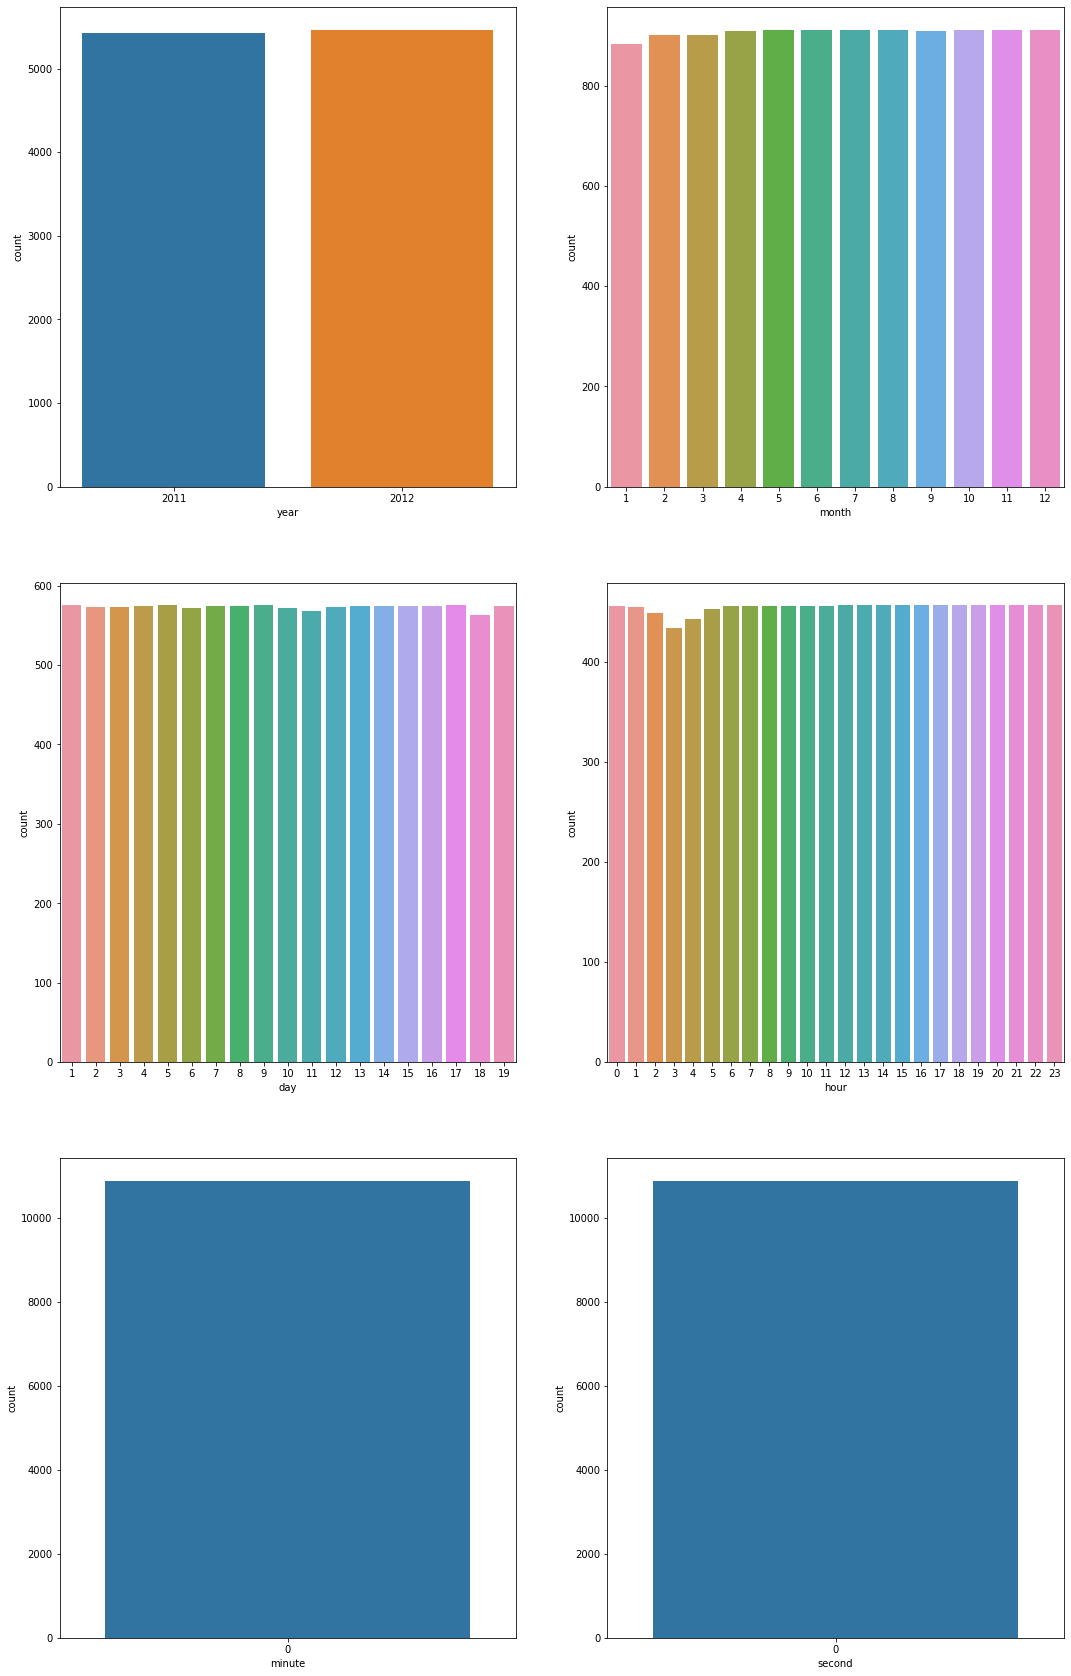

In [33]:
# subplots로 (3,2)에 size (18, 30)짜리 figure를 생성
fig, axes = plt.subplots(3, 2, figsize=(18,30))

# [0,0] 부터 [2,1] 까지 각각 time data를 그래프를 통해 시각화
sns.countplot(ax=axes[0,0], x=train['year'])
sns.countplot(ax=axes[0,1], x=train['month'])
sns.countplot(ax=axes[1,0], x=train['day'])
sns.countplot(ax=axes[1,1], x=train['hour'])
sns.countplot(ax=axes[2,0], x=train['minute'])
sns.countplot(ax=axes[2,1], x=train['second'])

### (4) X, y 컬럼 선택 및 train/test 데이터 분리
- X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다. 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다. ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?
  
  
  
- count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기

In [34]:
# 필요없는 등록 or 등록되지 않은 사람의 대여횟수 컬럼들 삭제
# count 컬럼이 이미 casual + registered 이기 때문

train = train.drop(['casual'], axis=1)
train = train.drop(['registered'], axis=1)

# 연월은 필요없으므로 삭제

train = train.drop(['year'], axis=1)
train = train.drop(['month'], axis=1)

# 분 초는 모두 데이터가 0이기 때문에 삭제

train = train.drop(['minute'], axis=1)
train = train.drop(['second'], axis=1)

# 평일 오후 3시의 데이터를 구하는것이기에 휴일 데이터 삭제

train = train.drop(['holiday'], axis=1)

In [35]:
# 오후 3시 데이터만 남김
train = train[train['hour'] == 15]

# 카운트 컬럼의 카운트가 0인 데이터 삭제
train = train[train['count'] != 0]

# workingday인 날만 남김
train = train[train['workingday'] == 1]

# weather 좋은 날만 남김
train = train[train['weather'] == 1]

In [36]:
# 항목들이 잘 drop 되었는지 확인

train.columns

Index(['season', 'workingday', 'weather', 'temp', 'atemp', 'humidity',
       'windspeed', 'count', 'day', 'hour'],
      dtype='object')

In [37]:
# train data의 index를 reset하고 그로 인해 생긴 index컬럼을 삭제후 train data 확인

train = train.reset_index()
train = train.drop(['index'], axis=1)
train.head()

,season,workingday,weather,temp,atemp,humidity,windspeed,count,day,hour
0,1,1,1,10.66,12.120,30,16.9979,72,3,15
1,1,1,1,11.48,13.635,52,16.9979,65,4,15
2,1,1,1,12.30,14.395,28,12.9980,62,5,15
3,1,1,1,11.48,13.635,36,0.0000,62,6,15
4,1,1,1,8.20,8.335,47,27.9993,49,12,15


#### ? index를 drop하는 이유. (사진 첨부) ? 
- 왜 index컬럼이 새로 생기는지 이해되지 않기에 drop으로 삭제했습니다.

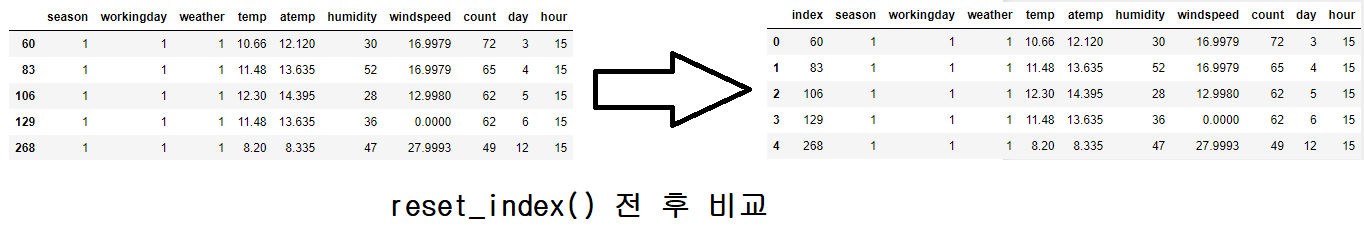

In [38]:
# x, y 변수에 각각 컬럼을 할당

x = train[['season', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'day','hour']].values
y = train['count'].values

In [39]:
# x변수의 형태 확인
x.shape

(210, 9)

In [40]:
# y변수의 형태 확인
y.shape

(210,)

In [41]:
# x, y data를 활용해 train data와 test data를 8:2 size로 분리

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

### (5) LinearRegression 모델 학습
- sklearn의 LinearRegression 모델 불러오기 및 학습하기

In [42]:
# LinearRegression import

from sklearn.linear_model import LinearRegression

In [43]:
# L_model에 LinearRegression 을 할당 후 train data에 학습

L_model = LinearRegression()
L_model.fit(x_train, y_train)

LinearRegression()

### (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
- 학습된 모델에 X_test를 입력해서 예측값 출력하기
  
  
- 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
  
  
- mse 값과 함께 rmse 값도 계산하기

In [44]:
# x_test를 입력하여 예측값 할당 후 출력

L_pred = L_model.predict(x_test)
L_pred

array([204.23001035, 237.59684772, 269.49977312, 236.75538366,
       250.18573171, 226.03430598, 236.44670483, 245.23709532,
       112.099419  , 214.30426393, 202.37864589, 250.98342207,
       233.33878292, 167.85057396, 168.89985045, 266.49109292,
       270.6840713 , 134.87851688, 254.72432193, 258.4632714 ,
       262.51691035, 208.99423591, 225.12977991, 130.47751075,
       115.99949293, 165.72111576, 142.70336233, 162.52370784,
       191.97935042, 272.37364406, 220.88561909, 276.14230843,
       221.70960175, 257.41030834, 102.69385356, 176.39996877,
       213.74371495, 243.43544296, 249.23129323, 282.20192142,
       257.95548462, 266.64682492])

In [45]:
# 손실함수 MSE 함수 정의

def MSE(a,b):
    mse = ((a-b)**2).mean() # 두 값의 차이의 제곱의 평균
    return mse

In [46]:
# 손실함수 RMSE 함수 정의

def RMSE(a, b):
    mse = ((a - b) ** 2).mean() # 두 값의 차이의 제곱의 평균
    rmse = mse ** 0.5 # mse의 제곱근
    return rmse

#### 손실함수 값 계산하기

In [47]:
MSE(y_test, L_pred)

5624.415249540816

In [48]:
RMSE(y_test, L_pred)

74.99610156228667

- MSE는 5624.41점, RMSE는 74.99점으로 루브릭 달성 조건을 충족하는 점수를 받았기에 적절한 model이라고 판단된다.

### (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
- x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
  
  
- x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기

In [49]:
# 시각화를 위한 matplotlib.pyplot을 plt로 import
import matplotlib.pyplot as plt

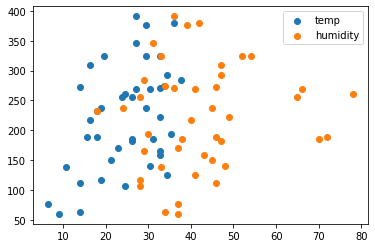

In [50]:
# 산점도 그래프를 통해 x축에는 3번 column = [temp] , 5번 column = [humidity]를 이용하였고 
# y축에는 y_test의 count data를 이용하여 산점도 그래프 시각화

# plt.legend()를 이용해 temp와 humidity의 구분을 만들고 참고단락을 만듬

plt.scatter(x_test[:, 3], y_test, label = "temp") # 3번 column이 temp
plt.scatter(x_test[:, 5], y_test, label = "humidity") # 5번 column이 humidity
plt.legend()
plt.show()

---

## (3) 회고
- 이번 프로젝트를 진행하면서 거의 모든 것이 어렵다는 것을 알았습니다. 제대로 이해되지 않는 부분이 많았으며 특히 model, loss같은 함수의 원리가 너무 어렴풋이만 이해가되어 사용하기에 어려움을 겪었습니다. 
- 또한 그래프 해석이 잘 되지 않아 결과값을 맞게 도출한 것인지 알기가 어려웠습니다.
  
  
- 이번 프로젝트에서 배우게 된 점은 유투브나 블로그 등을 통해 선형회귀분석, 단순선형회귀 같은 것들을 알아보았으나 제 수준에서 이해되지 않는 정보들이 많고 도움이 된 페이지는 __Reference__에 링크를 걸어두었습니다.
  
  
- 알아낸 점이나 모호한 점은 이번 페이지에서는 함수를 직접 정의하여 사용하는 경우가 많았는데 tensorflow같은 라이브러리를 이용하는 것을 보니 훨씬 잘 짜여진 라이브러리들이 많다는 것을 깨닫게 되었지만 이 내용을 이해하려면 좀 더 아날로그(?) 적인 방법을 이용하여 풀이를 진행해보는 것이 더 좋다고 생각이 들었습니다.
  
  
- 루브릭 평가지표를 맞추기 위해서는 사실 많은 노력을 하진 않았습니다. 진행방식을 정확히 이해하지 못해 평가모델을 사용하였고 그것을 통해 MSE나 RMSE를 구하였습니다. 구한 후 손실함수를 계산해보니 루브릭 평가지표에 해당하는 점수들이 나왔기에 노력한 점이라면 시각화를 위해 seaborn이나 matplotlib같은 라이브러리 이용법에 대해 조금 알아보았다고 말씀드릴 수 있을것 같습니다.
  
  
- 루브릭 평가지표를 맞추지 못했을 때의 이유라 함은 아마도 제가 이 노드에 대한 이해력이 많이 모자르기 때문에 model을 구하거나 loss 등을 통해 구한 가중치와 편향을 제대로 이용하지 못했기 때문에 그것 때문에 달성하지 못했다고 생각됩니다.

---

## (4) Reference
- https://datascienceschool.net/03%20machine%20learning/04.02%20%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D%EC%9D%98%20%EA%B8%B0%EC%B4%88.html 선형회귀분석의 기초
- https://www.youtube.com/watch?v=LZe94nm1lZg&t=297s 회귀분석 쌩기초! | 최소 제곱법
- https://www.youtube.com/watch?v=9Ur7bbZtoTc 선형회귀를 활용한 배추 가격 예측 AI 개발 - 다변인 선형회귀 모델 개발하기
- https://www.youtube.com/watch?v=oNc8guRKANI&t=1253s 빅데이터 분석기사 시험전 파이썬 실습 선형회귀 Linear Regression
- https://engineer-mole.tistory.com/234 numpy배열 ndarray를 결합시키는 법(concatenate)

---

## 자기다짐
  
  
- 앞으로 복습을 더 철저히 해야겠다는 생각이 들었습니다. 저번 노드에서도 복습하겠다고 했는데.. 이번 노드에서도 똑같이 복습하겠다는 얘기밖에는 할 수가 없는것 같습니다.. 그래도 점점 틀은 잡히고 있는것 같아 더 노력해보려고 합니다.
